# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as sts

# Import API key
from api_keys import weather_api_key as api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities[0:5])

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
import time 

In [5]:
# Tutor's help...

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
# List of city data
city_data = []

#Print to logger
print("Beginning data retrieval        ")
print("--------------------------------")

# Create counter
record_count = 1
set_count = 1 

# Loop through all cities in list
for i, city in enumerate(cities):
    
    # Group cities in groups of 50
    if (i %50==0 and i!=0):
        set_count += 1 
        record_count = 0
        time.sleep(3)
    # Create endpoint for each city
    city_url = url+'&q='+city
    print('Processing Record %s of Set %s | %s' % (record_count, set_count, city))
    
    record_count += 1 
    
    # Run API request for each city
    response = requests.get(city_url)
    results = response.json()
    
    try:
        city_lat = results['coord']['lat']
        city_lng = results['coord']['lon']
        city_max_temp = results['main']['temp_max']
        city_humidity = results['main']['humidity']
        city_clouds = results['clouds']['all']
        city_wind = results['wind']['speed']
        city_country = results['sys']['country']
        city_date = results['dt']

        # Append city info into city_data list
        city_data.append({'City Name': city,
                          'Lat': city_lat,
                          'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Clouds': city_clouds,
                         'Wind': city_wind,
                         'Country': city_country,
                         'Date': city_date})


    except KeyError as e:
        print('City Not Found. Skipping......')
        pass 
    
print("--------------------------------")
print('Data Retrieval Complete         ')
print("--------------------------------")


Beginning data retrieval        
--------------------------------
Processing Record 1 of Set 1 | fomboni
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | turtas
Processing Record 4 of Set 1 | aksarka
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | russell
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | vangaindrano
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | vaitupu
City Not Found. Skipping......
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | madang
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | nizwa
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Se

Processing Record 37 of Set 4 | kavaratti
Processing Record 38 of Set 4 | khandyga
Processing Record 39 of Set 4 | xinqing
Processing Record 40 of Set 4 | beringovskiy
Processing Record 41 of Set 4 | olafsvik
Processing Record 42 of Set 4 | port-gentil
Processing Record 43 of Set 4 | samusu
City Not Found. Skipping......
Processing Record 44 of Set 4 | kremenki
Processing Record 45 of Set 4 | mortka
Processing Record 46 of Set 4 | qaanaaq
Processing Record 47 of Set 4 | helong
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | high level
Processing Record 0 of Set 5 | banda aceh
Processing Record 1 of Set 5 | san policarpo
Processing Record 2 of Set 5 | tsihombe
City Not Found. Skipping......
Processing Record 3 of Set 5 | naze
Processing Record 4 of Set 5 | zarate
Processing Record 5 of Set 5 | mys shmidta
City Not Found. Skipping......
Processing Record 6 of Set 5 | buala
Processing Record 7 of Set 5 | marondera
Processing Record 8 of Set 5 | port alfred
Process

Processing Record 21 of Set 8 | caravelas
Processing Record 22 of Set 8 | kokopo
Processing Record 23 of Set 8 | tarashcha
Processing Record 24 of Set 8 | brownsville
Processing Record 25 of Set 8 | nikel
Processing Record 26 of Set 8 | launceston
Processing Record 27 of Set 8 | kendari
Processing Record 28 of Set 8 | abu dhabi
Processing Record 29 of Set 8 | dickinson
Processing Record 30 of Set 8 | bismarck
Processing Record 31 of Set 8 | malpe
Processing Record 32 of Set 8 | brae
Processing Record 33 of Set 8 | bontang
Processing Record 34 of Set 8 | requena
Processing Record 35 of Set 8 | maryborough
Processing Record 36 of Set 8 | yatou
Processing Record 37 of Set 8 | richards bay
Processing Record 38 of Set 8 | sept-iles
Processing Record 39 of Set 8 | port shepstone
Processing Record 40 of Set 8 | lewiston
Processing Record 41 of Set 8 | kununurra
Processing Record 42 of Set 8 | yulara
Processing Record 43 of Set 8 | nhulunbuy
Processing Record 44 of Set 8 | indian head
Processi

Processing Record 13 of Set 12 | panlaitan
Processing Record 14 of Set 12 | darlowo
Processing Record 15 of Set 12 | ibra
Processing Record 16 of Set 12 | atambua
Processing Record 17 of Set 12 | rudbar
Processing Record 18 of Set 12 | chalus
Processing Record 19 of Set 12 | touros
Processing Record 20 of Set 12 | guerrero negro
Processing Record 21 of Set 12 | palmer
Processing Record 22 of Set 12 | san blas
Processing Record 23 of Set 12 | aksu
Processing Record 24 of Set 12 | carballo
Processing Record 25 of Set 12 | golspie
Processing Record 26 of Set 12 | wahran
City Not Found. Skipping......
Processing Record 27 of Set 12 | acajutla
Processing Record 28 of Set 12 | chichli
Processing Record 29 of Set 12 | merauke
Processing Record 30 of Set 12 | hisua
Processing Record 31 of Set 12 | lushoto
Processing Record 32 of Set 12 | shubarshi
Processing Record 33 of Set 12 | shache
Processing Record 34 of Set 12 | salinopolis
Processing Record 35 of Set 12 | antofagasta
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data_df = pd.DataFrame(city_data) 
city_data_df.to_csv('city_data_df.csv', index=False, header=True)
city_data_df
              

,City Name,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Country,Date
0,fomboni,-12.2800,43.7425,75.67,73,0,13.49,KM,1628050559
1,cape town,-33.9258,18.4232,56.10,85,0,1.99,ZA,1628050559
2,turtas,58.9417,69.1325,69.01,63,0,4.68,RU,1628050559
3,aksarka,66.5606,67.7975,65.43,60,0,5.19,RU,1628050560
4,cherskiy,68.7500,161.3000,41.56,89,100,8.30,RU,1628050560
...,...,...,...,...,...,...,...,...,...
569,hulyaypole,47.6653,36.2578,67.28,68,99,5.44,UA,1628050808
570,ranot,7.7777,100.3213,87.91,62,100,19.55,TH,1628050638
571,znamenskoye,57.1281,73.8282,66.45,73,63,7.70,RU,1628050809
572,shambu,9.5667,37.1000,48.88,93,82,2.42,ET,1628050809


In [7]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,20.452188,20.035883,68.719129,70.024390,55.602787,7.342892,1.628051e+09
std,33.994528,89.342235,13.962378,20.931104,39.237840,5.520861,8.674856e+01
min,-54.800000,-179.166700,30.040000,10.000000,0.000000,0.000000,1.628050e+09
25%,-8.466700,-59.529150,58.107500,58.000000,13.250000,3.270000,1.628051e+09
50%,25.021050,24.730700,69.855000,75.000000,69.000000,5.750000,1.628051e+09
75%,50.100075,100.349575,79.580000,87.000000,96.000000,10.280000,1.628051e+09
max,78.218600,179.316700,99.300000,100.000000,100.000000,36.480000,1.628051e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

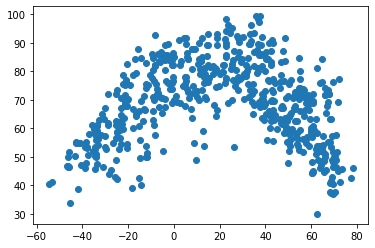

In [10]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
plt.show()

## Latitude vs. Humidity Plot

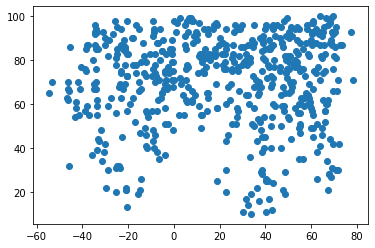

In [11]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.show()

## Latitude vs. Cloudiness Plot

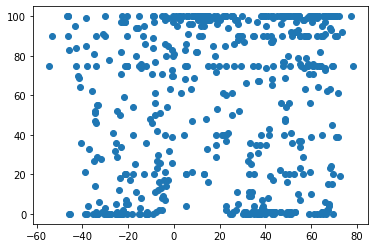

In [12]:
plt.scatter(city_data_df['Lat'], city_data_df['Clouds'])
plt.show()

## Latitude vs. Wind Speed Plot

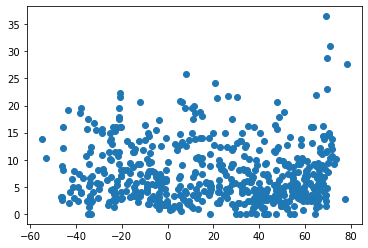

In [13]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind'])
plt.show()

## Linear Regression

In [14]:
north = city_data_df['Lat']>0
south = city_data_df['Lat']<0
north_hemi = city_data_df.loc[north]
south_hemi = city_data_df.loc[south]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

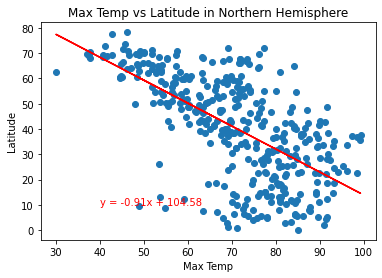

In [15]:
x_values = north_hemi['Max Temp']
y_values = north_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=10,color="red")
plt.title('Max Temp vs Latitude in Northern Hemisphere')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.savefig('Max Temp vs Latitude in Northern Hemisphere.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

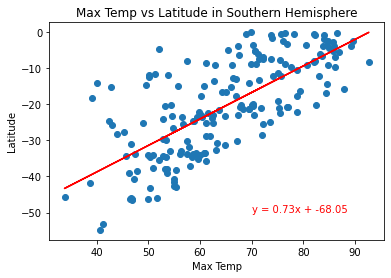

In [16]:
x_values = south_hemi['Max Temp']
y_values = south_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,-50),fontsize=10,color="red")
plt.title('Max Temp vs Latitude in Southern Hemisphere')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.savefig('Max Temp vs Latitude in Southern Hemisphere.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

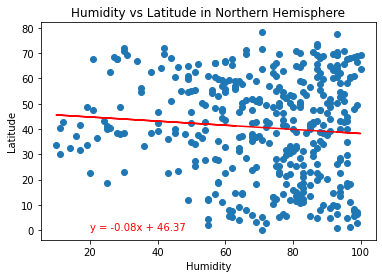

In [17]:
x_values = north_hemi['Humidity']
y_values = north_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,0),fontsize=10,color="red")
plt.title('Humidity vs Latitude in Northern Hemisphere')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.savefig('Humidity vs Latitude in Northern Hemisphere.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

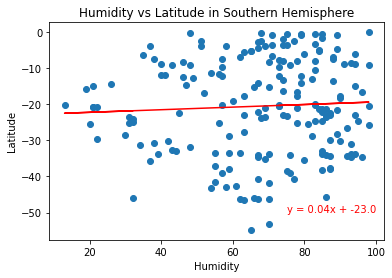

In [18]:
x_values = south_hemi['Humidity']
y_values = south_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,-50),fontsize=10,color="red")
plt.title('Humidity vs Latitude in Southern Hemisphere')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.savefig('Humidity vs Latitude in Southern Hemisphere.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

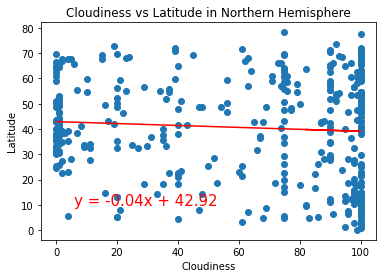

In [19]:
x_values = north_hemi['Clouds']
y_values = north_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Cloudiness vs Latitude in Northern Hemisphere')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.savefig('Cloudiness vs Latitude in Northern Hemisphere.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

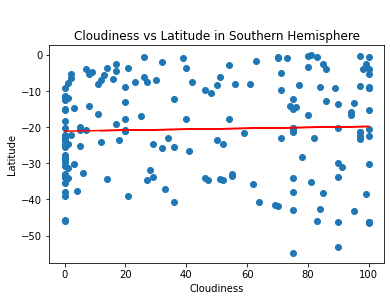

In [20]:
x_values = south_hemi['Clouds']
y_values = south_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Cloudiness vs Latitude in Southern Hemisphere')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.savefig('Cloudiness vs Latitude in Southern Hemisphere.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

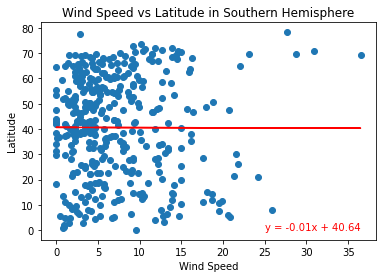

In [21]:
x_values = north_hemi['Wind']
y_values = north_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,0),fontsize=10,color="red")
plt.title('Wind Speed vs Latitude in Southern Hemisphere')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.savefig('Wind Speed vs Latitude in Southern Hemisphere.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

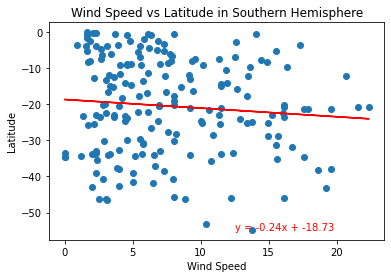

In [22]:
x_values = south_hemi['Wind']
y_values = south_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12.5,-55),fontsize=10,color="red")
plt.title('Wind Speed vs Latitude in Southern Hemisphere')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.savefig('Wind Speed vs Latitude in Southern Hemisphere.png')
plt.show()

'/Users/brianmclane/python-api-challenge/WeatherPy'